## 1. Setup and load

### 1.1 Install dependenicies and setup

In [31]:
%pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [32]:
%pip list

Package                   Version
------------------------- -----------
absl-py                   2.1.0
aiohttp                   3.9.5
aiosignal                 1.3.1
altair                    5.3.0
annotated-types           0.6.0
anyio                     4.3.0
asttokens                 2.4.1
astunparse                1.6.3
attrs                     23.2.0
blinker                   1.8.2
cachetools                5.3.3
certifi                   2024.2.2
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
dataclasses-json          0.6.6
debugpy                   1.8.1
decorator                 5.1.1
distro                    1.9.0
executing                 2.0.1
flatbuffers               24.3.25
fonttools                 4.53.1
frozenlist                1.4.1
gast                      0.6.0
gitdb                     4.0.11
GitPython              

In [56]:
import tensorflow as tf
import os

In [34]:
os.path.join('data', 'happy')
# returns the folder structure format which is appropriate to the working environment

'data\\happy'

### 1.2 Remove dodgy images

In [35]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [36]:
data_dir='data'

In [37]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile-svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-r.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '360_F_313450534_bHkt5SoetREYpgWO5uOpceVnaDCngOX7.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e0000b300705475.jpeg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '9-not-need-happy.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'ACg8ocLJgJe_XthFRy-e6CtwgJ3VlksFRgXF4hmE3AQY1zdZ4jsmEad7-s12.png',
 'ACg8ocLJgJe_XthFRy-e6CtwgJ3VlksFRgXF4hmE3AQY1zdZ4jsmEad7.png',
 'aecd7b04-bb40-42ad-9985-d63a3198a878.jpg',
 'AF2bZyiuVSDW7er9410Bmdy3v2Vr9NL7VzTQoNVfJ

In [38]:
image_exts=['jpeg','jpg','bmp','png']

In [39]:
cv2.imread(os.path.join('data', 'happy', 'Super-Happy-People-yay.jpg'))

array([[[224, 187, 131],
        [224, 187, 131],
        [225, 186, 134],
        ...,
        [195, 110,   1],
        [196, 111,   2],
        [196, 111,   2]],

       [[221, 184, 128],
        [221, 184, 128],
        [223, 184, 132],
        ...,
        [196, 111,   2],
        [197, 112,   3],
        [197, 112,   3]],

       [[218, 183, 127],
        [218, 183, 127],
        [220, 183, 131],
        ...,
        [197, 112,   3],
        [197, 112,   3],
        [197, 112,   3]],

       ...,

       [[ 42, 128, 210],
        [  0,  86, 162],
        [ 17, 104, 170],
        ...,
        [ 59, 155, 208],
        [ 87, 188, 240],
        [ 90, 192, 244]],

       [[ 16, 105, 185],
        [  0,  89, 163],
        [ 38, 125, 191],
        ...,
        [ 51, 151, 205],
        [ 75, 177, 230],
        [ 89, 193, 246]],

       [[ 18, 108, 185],
        [ 32, 121, 195],
        [ 75, 163, 227],
        ...,
        [ 75, 177, 230],
        [ 81, 185, 238],
        [ 85, 191, 244]]

In [40]:
img = cv2.imread(os.path.join('data', 'happy', 'Super-Happy-People-yay.jpg'))
img.shape

(1050, 1680, 3)

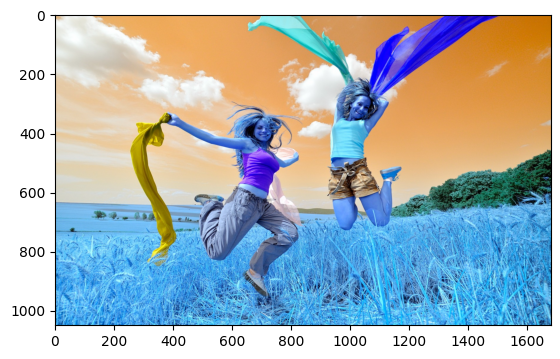

In [41]:
plt.imshow(img)

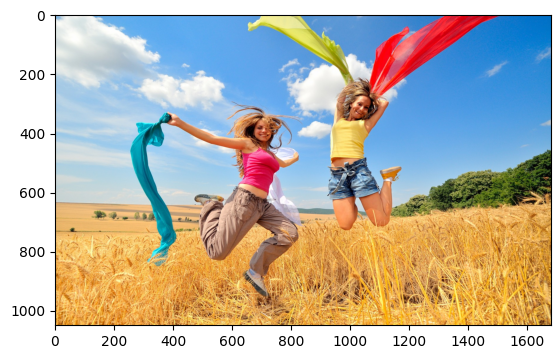

In [42]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

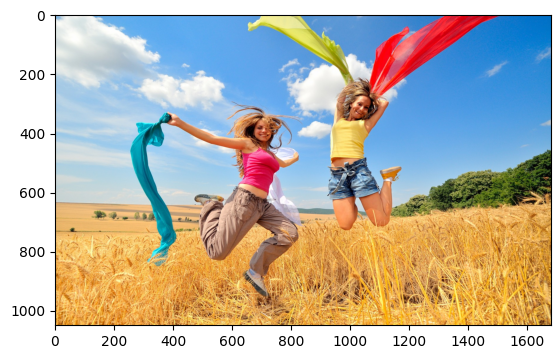

In [43]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [75]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(' image not in list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image {}'.format(image_path))

### 1.3 Load data

In [45]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [55]:
import numpy as np
from matplotlib import pyplot as plt

In [47]:
tf.keras.utils.image_dataset_from_directory??
## u can also change any part acc to urself
## tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)
Source:   
@keras_export(
    [
        "keras.utils.image_dataset_from_directory",
        "keras.preprocessing.image_dataset_from_directory",
    ]
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    ve

In [48]:
data= tf.keras.utils.image_dataset_from_directory('data')
## 1. Building data pipeline

Found 219 files belonging to 2 classes.


In [49]:
data_iterator = data.as_numpy_iterator()
## 2. accessing data pipeline (looping)
# used because we cannot directly access files from data dierctory

In [77]:
# Get another batch from the iterator
# run it as many times to get another batch of images
batch = data_iterator.next()
## 2. accessing data pipeline (one batch back)

In [51]:
batch

(array([[[[2.98632812e+01, 2.88632812e+01, 7.08632812e+01],
          [2.54101562e+01, 2.44101562e+01, 6.64101562e+01],
          [2.60000000e+01, 2.50000000e+01, 6.70000000e+01],
          ...,
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01],
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01],
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01]],
 
         [[2.98632812e+01, 2.88632812e+01, 7.08632812e+01],
          [2.54101562e+01, 2.44101562e+01, 6.64101562e+01],
          [2.60000000e+01, 2.50000000e+01, 6.70000000e+01],
          ...,
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01],
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01],
          [3.10000000e+01, 3.10000000e+01, 6.90000000e+01]],
 
         [[2.90000000e+01, 2.80000000e+01, 7.00000000e+01],
          [2.61289062e+01, 2.51289062e+01, 6.71289062e+01],
          [2.68811951e+01, 2.58811951e+01, 6.78811951e+01],
          ...,
          [3.10000000e+01, 3.10000000e+01, 6.9000

In [52]:
len(batch)
# contains 2 parts, 1st images, 2nd labels

2

In [53]:
#images represented as numpy arrays
batch[0].shape
# done according to keras util

(32, 256, 256, 3)

In [54]:
# class 1 - sad
# class 0 - happy
batch[1]
## 0,1 represent happy/sad or sad/happy

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0])

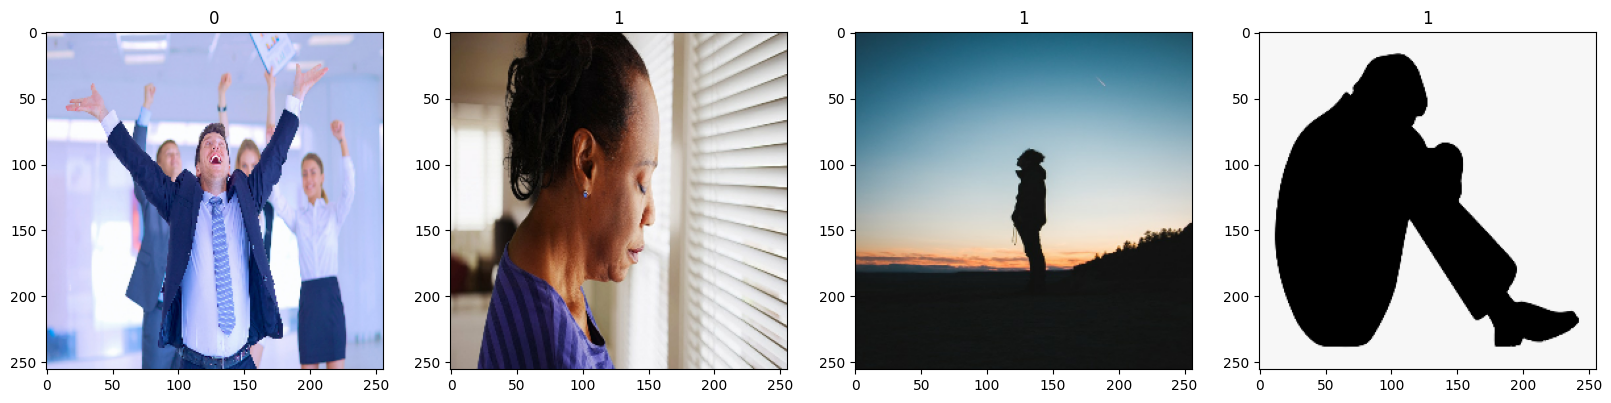

In [59]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Process Data

### 2.1 Scale Data

In [61]:
scaled = batch[0] / 255
# batch[0] -> image
# batch[1] -> label
## dividing batch[0] by 255 coverts each image to be represented
## in between 0 and 1
scaled. max()

1.0

In [73]:
# do the transformation at the time of loading the data

data = data.map(lambda x, y: (x/255, y))

# read more in tf.data documentation

In [74]:
data.as_numpy_iterator().next()[0].max()

1.0

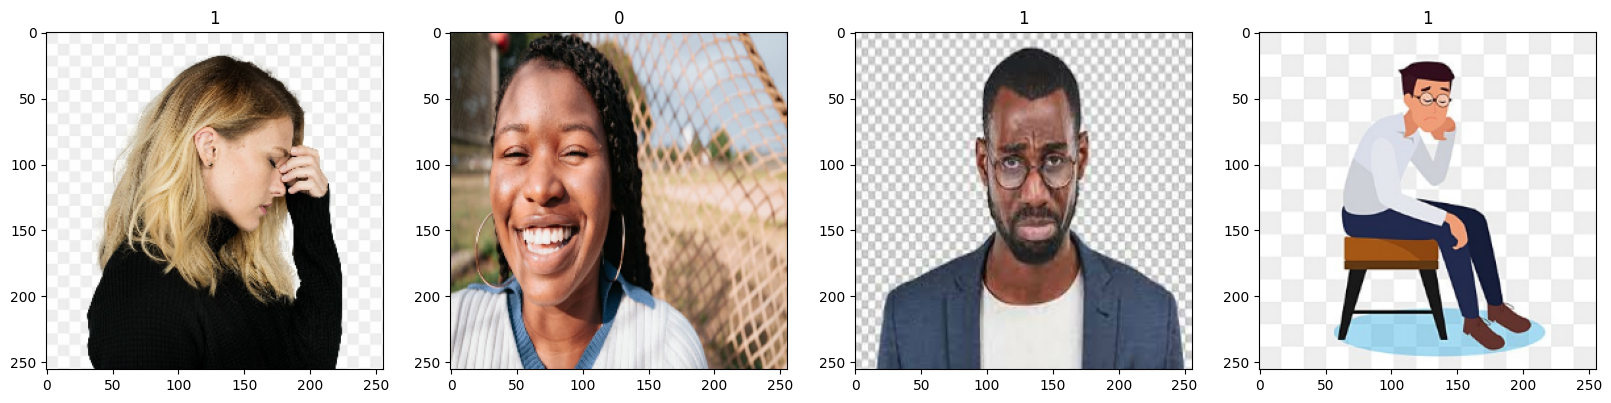

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split Data

In [79]:
len(data)

7

In [84]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [87]:
train_size+val_size+test_size

7

In [88]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [92]:
len(test)

1

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [113]:
## model has various ways to implement
model = Sequential()

In [98]:
## MaxPooling2D??

In [114]:
# 3 Convolution Blocks, 1 Flatten layer, 2 Dense layers

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [115]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [116]:
model.summary()
# dense got 257 -> weights(256) + bias(1)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

### 3.2 Train

In [117]:
logdir='logs'

In [118]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [119]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5333 - loss: 1.4593 - val_accuracy: 0.4844 - val_loss: 0.7975
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4302 - loss: 0.8083 - val_accuracy: 0.5000 - val_loss: 0.6715
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6646 - loss: 0.6090 - val_accuracy: 0.6094 - val_loss: 0.5815
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step - accuracy: 0.6052 - loss: 0.6320 - val_accuracy: 0.6719 - val_loss: 0.5375
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 930ms/step - accuracy: 0.6667 - loss: 0.5169 - val_accuracy: 0.8750 - val_loss: 0.4881
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8406 - loss: 0.4930 - val_accuracy: 0.9062 - val_loss: 0.4280
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 971ms/step - accuracy: 0.9094 - loss: 0.3873 - val_accuracy: 0.8281 - val_loss: 0.3655
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8781 - loss: 0.3528 - val_accuracy: 0.8906 - val_loss: 0.3008
Epoch 9

In [121]:
hist.history

{'accuracy': [0.5078125,
  0.484375,
  0.6953125,
  0.5625,
  0.7109375,
  0.8203125,
  0.8671875,
  0.875,
  0.9140625,
  0.8984375,
  0.921875,
  0.9375,
  0.96875,
  0.984375,
  0.96875,
  0.984375,
  0.96875,
  0.9609375,
  0.984375,
  0.984375],
 'loss': [1.5085718631744385,
  0.7472450733184814,
  0.5903069972991943,
  0.6871434450149536,
  0.5165525674819946,
  0.47348713874816895,
  0.40756717324256897,
  0.36175501346588135,
  0.2596612572669983,
  0.25550147891044617,
  0.20666271448135376,
  0.15460675954818726,
  0.1418013721704483,
  0.07962872087955475,
  0.08682988584041595,
  0.0624258778989315,
  0.08324036002159119,
  0.10452568531036377,
  0.07425433397293091,
  0.05933910608291626],
 'val_accuracy': [0.484375,
  0.5,
  0.609375,
  0.671875,
  0.875,
  0.90625,
  0.828125,
  0.890625,
  0.953125,
  0.859375,
  0.9375,
  0.984375,
  0.96875,
  1.0,
  0.984375,
  0.953125,
  0.984375,
  0.984375,
  1.0,
  1.0],
 'val_loss': [0.7974869012832642,
  0.6715257167816162,
  

### 3.3 Plot performance

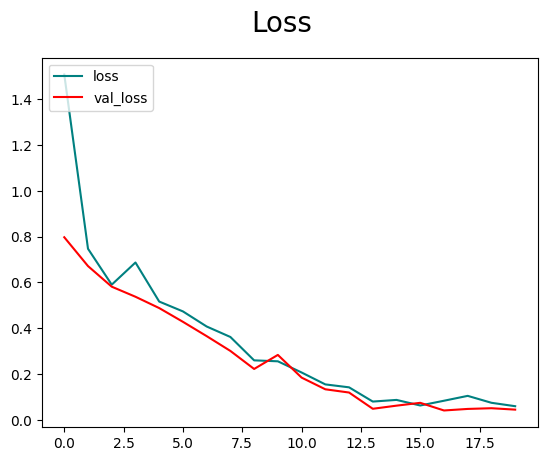

In [122]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

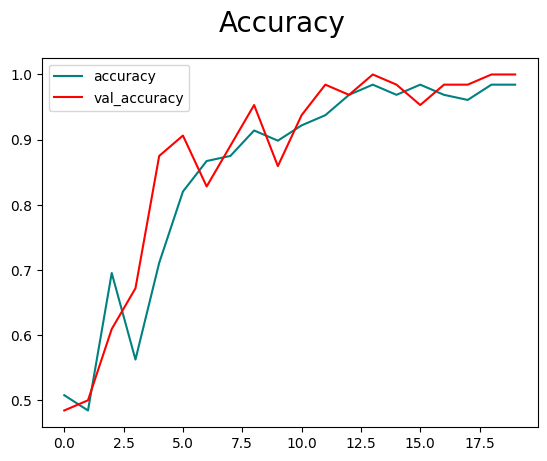

In [123]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 4. Evaluate performance

### 4.1 Evaluate

In [124]:
from tensorflow.python.keras.metrics import Precision, Recall, BinaryAccuracy

In [125]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [126]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step


In [128]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy: 1.0


### 4.2 Test

In [129]:
import cv2

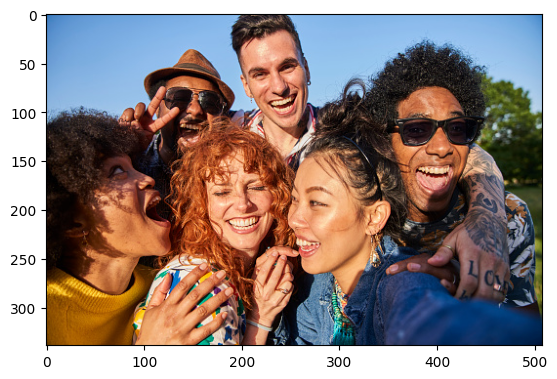

In [149]:
img = cv2.imread('happytest2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

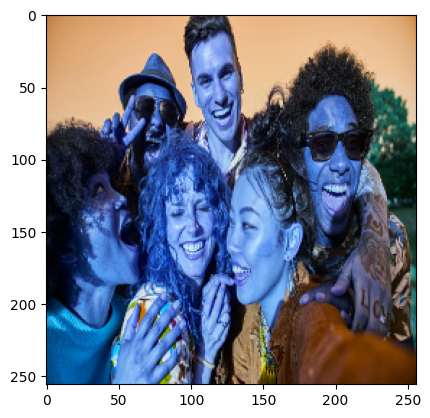

In [150]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [151]:
resize.shape

TensorShape([256, 256, 3])

In [152]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [153]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [154]:
yhat

array([[0.00651101]], dtype=float32)

In [155]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicated class is Happy')

Predicated class is Happy


## 5. Save the model

### 5.1 Save the model

In [168]:
from tensorflow.keras.models import load_model

In [169]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [170]:
os.path.join('models', 'happysadmodel.h5')

'models\\happysadmodel.h5'

In [171]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [172]:
new_model

<Sequential name=sequential_1, built=True>

In [174]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [175]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicated class is Happy')

Predicated class is Happy
